<h1>Exploratory Data Analysis on Bank of Botswana data for Inflation Rates, Exchange Rates, and Prices</h1>

<h3>Introduction</h3>

This is the second notebook for the project for predicting inflation rate using data collected from Bank of Botswana. The first notebook was about collecting the data and cleaning it by dealing with various issues such as missing values.

This notebook will take a look at various patterns in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Bringing the cleaned data into the notebook

In [2]:
df = pd.read_csv('../Data/Economic_Data_BOB')

In [3]:
df.head()

,date,7 Day Bobc,1 Month BoBC,CHN,EUR,GBP,USD,SDR,YEN,ZAR,CPI,CPIT,CPIXA
0,2022-09-02,2.65,2.43,0.5340,0.0775,0.0670,0.0772,0.0595,10.84,1.3355,12.7,10.3,6.6
1,2022-09-01,2.65,2.43,0.5359,0.0774,0.0670,0.0775,0.0596,10.80,1.3333,12.7,10.3,6.6
2,2022-08-31,2.65,2.43,0.5395,0.0779,0.0669,0.0782,0.0599,10.82,1.3234,12.7,10.3,6.6
3,2022-08-30,2.15,2.43,0.5420,0.0783,0.0669,0.0783,0.0601,10.85,1.3191,12.7,10.3,6.6
4,2022-08-29,2.15,2.43,0.5405,0.0785,0.0669,0.0780,0.0600,10.83,1.3216,12.7,10.3,6.6


In [4]:
df.tail(10)

,date,7 Day Bobc,1 Month BoBC,CHN,EUR,GBP,USD,SDR,YEN,ZAR,CPI,CPIT,CPIXA
5497,2009-07-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,6.0,7.4,14.2
5498,2009-08-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,6.1,6.9,13.4
5499,2009-02-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,11.7,10.2,15.8
5500,2009-03-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,11.7,10.6,15.8
5501,2008-11-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,15.0,13.6,15.5
5502,2008-05-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,12.1,11.0,9.1
5503,2008-06-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,14.5,12.5,9.8
5504,2008-07-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,15.0,12.7,11.1
5505,2008-03-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,9.8,9.7,8.9
5506,2008-01-01,11.96,0.0,0.0,0.100726,0.089723,0.140546,0.091038,13.1275,1.175903,8.4,7.9,7.2


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.set_index('date', inplace=True)

In [7]:
df = df.loc['2008-01-01':'2022-09-02']

In [8]:
df.head(20)

,7 Day Bobc,1 Month BoBC,CHN,EUR,GBP,USD,SDR,YEN,ZAR,CPI,CPIT,CPIXA
date,,,,,,,,,,,,
2022-09-02,2.65,2.43,0.5340,0.0775,0.0670,0.0772,0.0595,10.84,1.3355,12.7,10.3,6.6
2022-09-01,2.65,2.43,0.5359,0.0774,0.0670,0.0775,0.0596,10.80,1.3333,12.7,10.3,6.6
2022-08-31,2.65,2.43,0.5395,0.0779,0.0669,0.0782,0.0599,10.82,1.3234,12.7,10.3,6.6
2022-08-30,2.15,2.43,0.5420,0.0783,0.0669,0.0783,0.0601,10.85,1.3191,12.7,10.3,6.6
2022-08-29,2.15,2.43,0.5405,0.0785,0.0669,0.0780,0.0600,10.83,1.3216,12.7,10.3,6.6
2022-08-26,2.15,2.43,0.5393,0.0788,0.0665,0.0785,0.0602,10.75,1.3176,12.7,10.3,6.6
2022-08-25,2.15,2.43,0.5379,0.0783,0.0662,0.0785,0.0600,10.72,1.3225,12.7,10.3,6.6
2022-08-24,2.15,2.43,0.5359,0.0784,0.0660,0.0779,0.0598,10.66,1.3294,12.7,10.3,6.6
2022-08-23,2.15,2.44,0.5360,0.0786,0.0664,0.0779,0.0599,10.70,1.3278,12.7,10.3,6.6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3771 entries, 2022-09-02 to 2008-01-01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   7 Day Bobc    3771 non-null   float64
 1   1 Month BoBC  3771 non-null   float64
 2   CHN           3771 non-null   float64
 3   EUR           3771 non-null   float64
 4   GBP           3771 non-null   float64
 5   USD           3771 non-null   float64
 6   SDR           3771 non-null   float64
 7   YEN           3771 non-null   float64
 8   ZAR           3771 non-null   float64
 9   CPI           3771 non-null   float64
 10  CPIT          3771 non-null   float64
 11  CPIXA         3771 non-null   float64
dtypes: float64(12)
memory usage: 383.0 KB


As expected, there are no missing values. A quick look at summary statistics:

In [10]:
df.describe()

,7 Day Bobc,1 Month BoBC,CHN,EUR,GBP,USD,SDR,YEN,ZAR,CPI,CPIT,CPIXA
count,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000
mean,4.194962,0.021199,0.240576,0.090499,0.076469,0.113843,0.077152,11.440367,1.234126,5.906046,5.569451,5.716309
std,3.791778,0.225670,0.302073,0.011229,0.010232,0.024041,0.017314,1.658064,0.114577,3.431899,3.065374,3.178861
min,0.730000,0.000000,0.000000,0.071800,0.058800,0.077200,0.059500,8.690000,1.025800,0.900000,1.000000,1.600000
25%,1.290000,0.000000,0.000000,0.082200,0.067600,0.092900,0.067000,10.210000,1.141650,3.100000,2.900000,3.300000
50%,3.010000,0.000000,0.000000,0.086700,0.074200,0.104800,0.072800,11.100000,1.236300,4.600000,4.200000,5.300000
75%,6.570000,0.000000,0.599650,0.100726,0.084800,0.138200,0.089450,12.340000,1.324050,8.200000,7.900000,7.000000
max,13.130000,2.440000,0.678700,0.117500,0.100400,0.167700,0.821000,18.210000,1.549000,15.100000,13.600000,16.400000


<h3>Exploratory Data Analysis - Data Visualization</h3>

The target variable here is inflation rate. The goal to the project is to see whether we can predict inflation rate based on the other variables. Below, we shall plot a few graphs to see if there is any correlation with inflation rate.

Firstly, we shall look at currencies and plot them against inflation rate. Our Inflation rate will be the CPI since it is widely accepted as inflation rate.

In [11]:
print('China Yuan: ' + str(df['CPI'].corr(df['CHN'])))
print('Euro: ' + str(df['CPI'].corr(df['EUR'])))
print('British Pound: ' + str(df['CPI'].corr(df['GBP'])))
print('US Dollar: ' + str(df['CPI'].corr(df['USD'])))
print('Special Drawing Rights: ' + str(df['CPI'].corr(df['SDR'])))
print('Japanese Yen: ' + str(df['CPI'].corr(df['YEN'])))
print('South African Rand: ' + str(df['CPI'].corr(df['ZAR'])))

China Yuan: -0.33564989847939714
Euro: 0.43209037875969547
British Pound: 0.3733959511319969
US Dollar: 0.5299863973171306
Special Drawing Rights: 0.3675758968414081
Japanese Yen: 0.5118651086157803
South African Rand: -0.4289183619093807


The US Dollar has the highest correlation coefficient out of all the currencies with 0.599 followed by the YEN with 0.549. The scatter plot below does show some correlation.

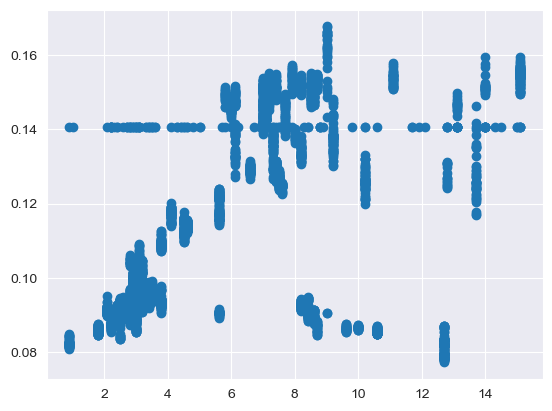

In [12]:
plt.scatter(df['CPI'], df['USD'])

Next we explore correlation between inflation and interest rates.

In [13]:
print('7 Day Bobc: ' + str(df['CPI'].corr(df['7 Day Bobc'])))
print('1 Month BoBC: ' + str(df['CPI'].corr(df['1 Month BoBC'])))

7 Day Bobc: 0.6584285255025644
1 Month BoBC: 0.18601032900879408


The 7 Day Bobc has a significantly high correlation with inflation. It could possibly be a great predictor for inflation.

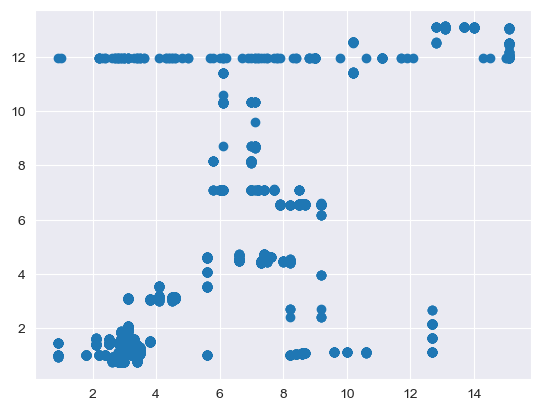

In [14]:
plt.scatter(df['CPI'], df['7 Day Bobc'])

As can be seen above, it is pretty clear that there is a fairly strong correlation between CPI and the 7 day Bobc.

The next step is to make a few plots to see whether there is any seasonality in the data.

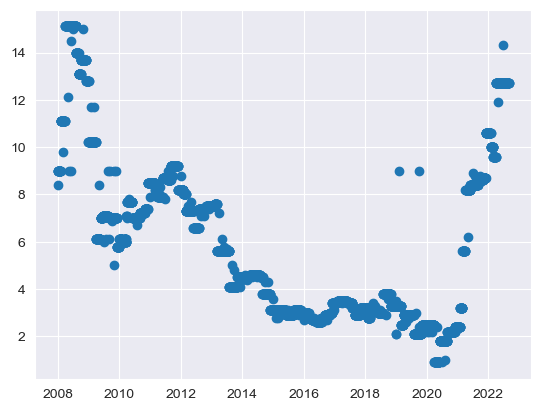

In [16]:
plt.scatter(df.index, df['CPI'])

The scatterplot above shows that CPI was extremely high in 2008 (Possibly due to the recession) although prices were dropping rapidly. There was a small spike in 2012 and then prices dropped significantly and stayed there until 2020. Since 2020, prices have shot up again. Probably due to the covid pandemic and the war between russia and Ukraine. Lets see how the value of USD varied in comparison.

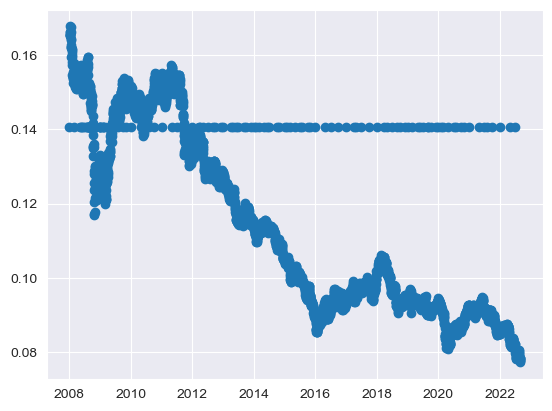

In [17]:
plt.scatter(df.index, df['USD'])

The value of the USD in comparison with the pula has been consistently dropping since 2008.

<AxesSubplot:xlabel='date', ylabel='CPI'>

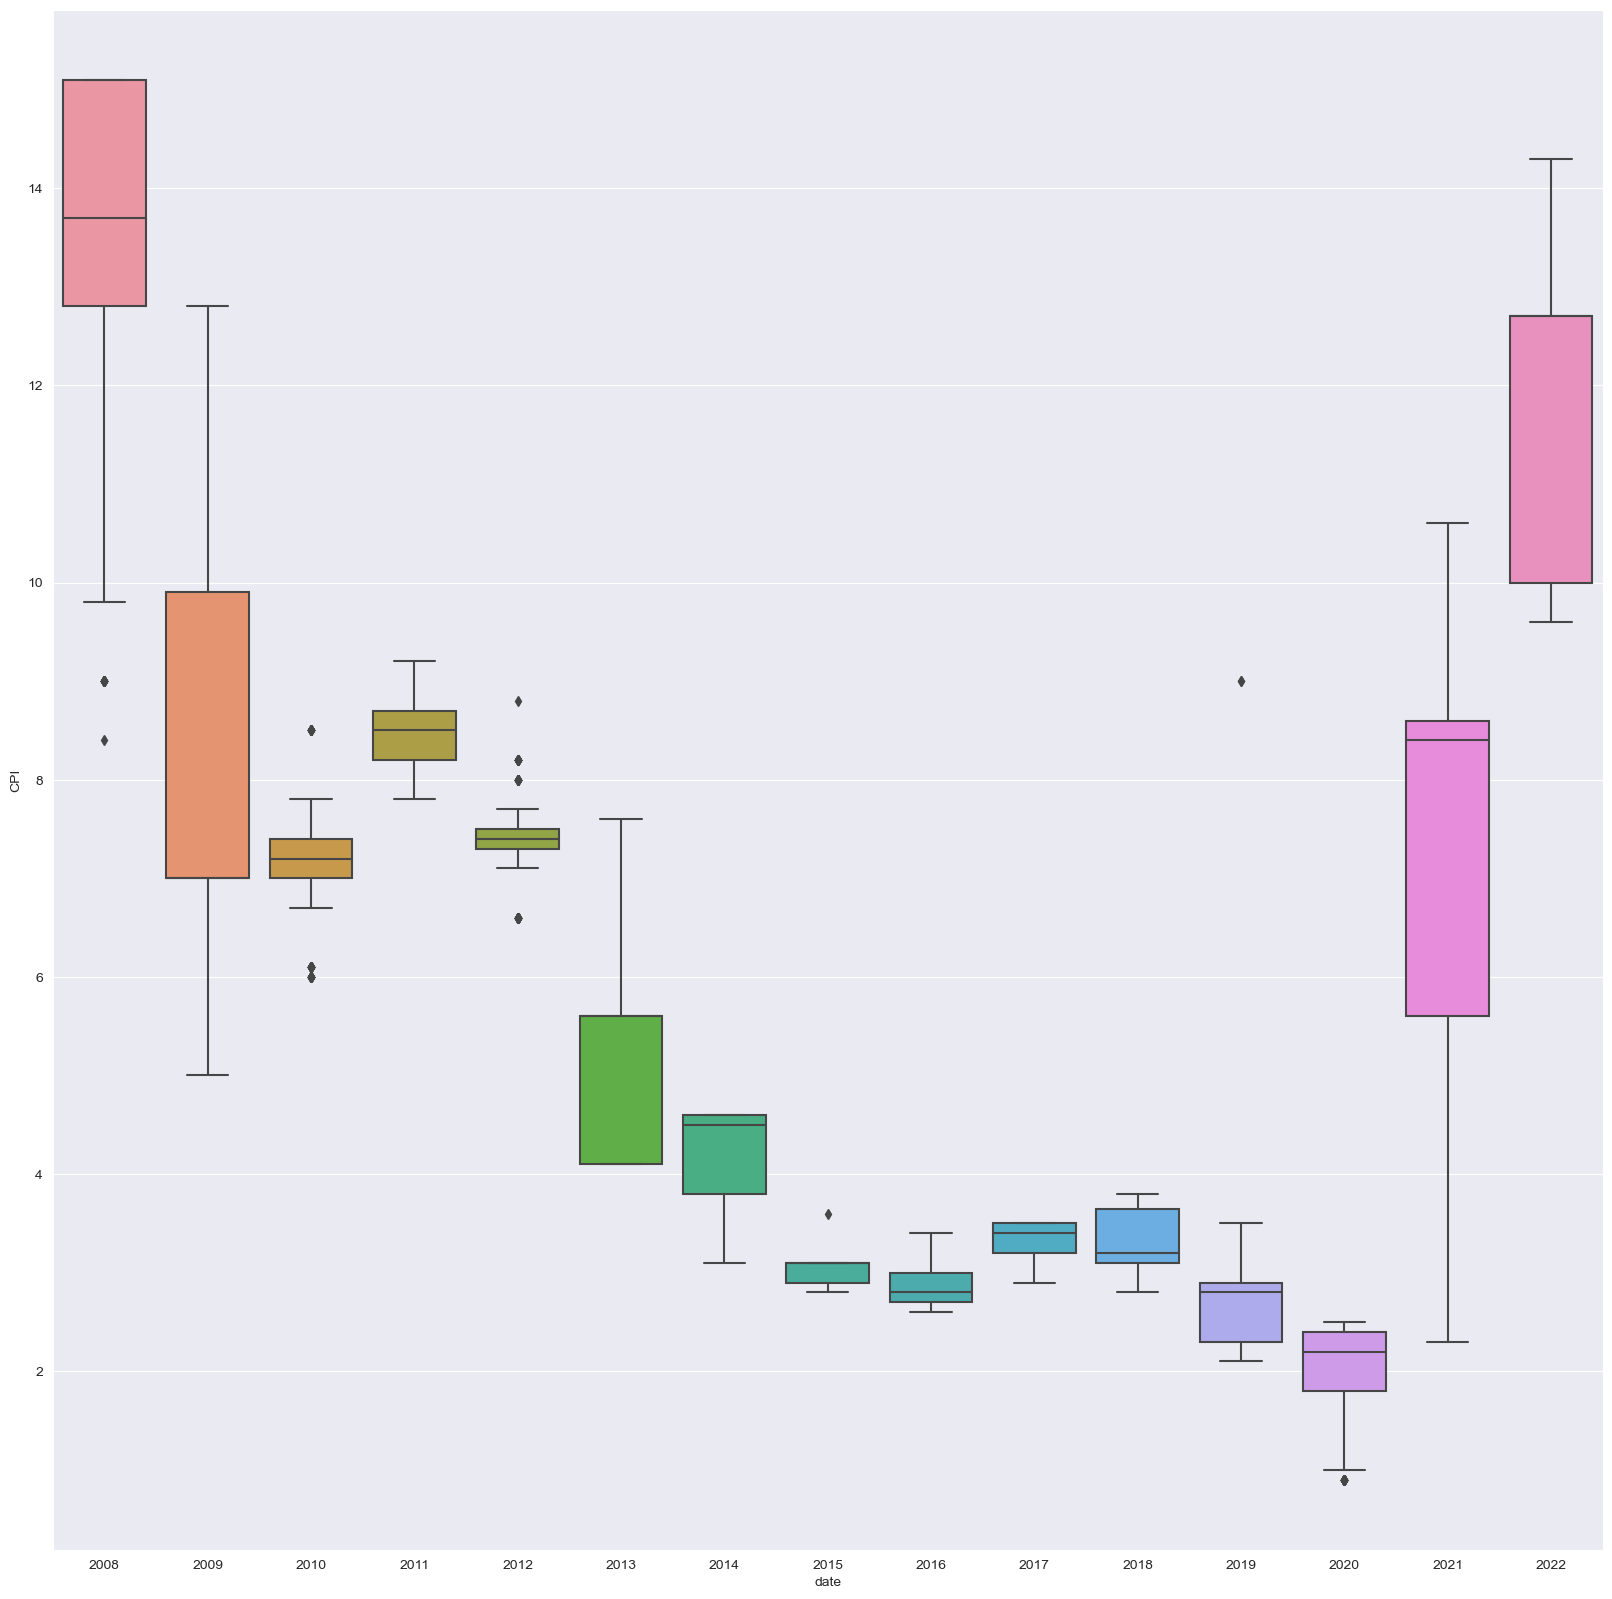

In [18]:
plt.figure(figsize=(20,20))
sns.boxplot(y=df['CPI'], x=df.index.year)

CPI is most volatile in 2021. Ranging from around 2.5 to 10.5. It is lowest in 2020 and highest in 2008. 2022 is the second highest.